In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('ventas.csv')
data

,TV,Radio,Periodico,Ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Buscar predecir las ventas en Función de invertir en TV

In [3]:
import statsmodels.formula.api as smf

# Modelo Lineal

 smf.ols se utiliza para especificar un modelo de regresión lineal simple donde y es la variable de respuesta y x es la variable independiente. Luego, el modelo se ajusta a los datos y se imprimen los resultados resumidos.

In [4]:
data.columns

Index(['TV', 'Radio', 'Periodico', 'Ventas'], dtype='object')

### Matriz de correlación

In [59]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,TV,Radio,Periodico,Ventas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Periodico,0.056648,0.354104,1.000000,0.228299
Ventas,0.782224,0.576223,0.228299,1.000000


In [7]:
lm = smf.ols(formula = 'Ventas~TV', data = data).fit()
lm

In [8]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Estos parámetros son de la ecuación de la recta
$$y =mx +b$$

#### Donde:

  * m - es la pendiente de la recta.
    
  * b - es el intecepto.
  

Por lo tanto:

TV es la variable,  0.047537 es la pendiente y 7.032594 es el intercepto.

# Modelo predictivo

$$ lm= \text{ventas}= 0.047537 *TV + 7.032594$$


El valor de $R^2$ proporciona información sobre la proporción de la variabilidad en la variable de respuesta que es explicada por el modelo. Un valor más cercano a 1 indica un mejor ajuste del modelo a los datos.

$R^2$ , o ***coeficiente de determinación***, es una medida de cuánta variabilidad en la variable de respuesta (en un modelo de regresión) es explicada por el modelo en comparación con la variabilidad total en los datos.

En otras palabras, $R^2$ proporciona una indicación de qué tan bien el modelo se ajusta a los datos. 

El R2 varía entre 0 y 1, donde:

   * Si $R^2$ =0, significa que el modelo no explica nada de la variabilidad en los datos y no se ajusta en absoluto.
    
   * Si $R^2$ =1, significa que el modelo explica toda la variabilidad en los datos y se ajusta perfectamente.

In [9]:
lm.rsquared

0.6118750508500712

$R^2=0.6118750508500712$ indica que aproximadamente el 61.19% de la variabilidad en la variable de respuesta (probablemente "ventas" en tu modelo) se explica por el modelo de regresión que estás utilizando. 

Esto significa que el modelo es capaz de explicar un poco más del 61% de la variabilidad en las ventas, lo que sugiere que el modelo tiene un ajuste razonable a los datos, pero todavía queda algo de variabilidad no explicada. 

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        08:54:19   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3>Resumen del Modelo de Regresión Lineal</h3> <h4>Variable Dependiente</h4> <p>En este caso, la variable dependiente es "Ventas", lo que significa que estás tratando de predecir las ventas en función de otras variables, probablemente "TV" en este contexto.</p> <h4>R-cuadrado</h4> <p>El valor de R2 es 0.612. Este es el coeficiente de determinación, que indica que aproximadamente el 61.2% de la variabilidad en las ventas se explica por el modelo de regresión utilizado. Cuanto más alto sea este valor, mejor será el ajuste del modelo a los datos.</p> <h4>Modelo</h4> <p>Se indica que se está utilizando un modelo de Regresión de Mínimos Cuadrados Ordinarios (OLS), que es un enfoque común para ajustar modelos de regresión lineal.</p> <h4>R-cuadrado Ajustado</h4> <p>El valor del R2 ajustado es 0.610. El R2 ajustado tiene en cuenta la cantidad de predictores en el modelo y penaliza los modelos con demasiados predictores. Es una medida más conservadora del ajuste del modelo.</p> <h4>Método</h4> <p>Se utilizó el método de Mínimos Cuadrados Ordinarios (Least Squares) para ajustar el modelo.</p> <h4>Estadístico F</h4> <p>El valor del estadístico F es 312.1. El estadístico F se utiliza para evaluar la significancia conjunta de todos los coeficientes del modelo. En este caso, es muy probable que al menos un predictor esté relacionado con la variable de respuesta.</p> <h4>Probabilidad del Estadístico F</h4> <p>El valor es 1.47e-42, que es esencialmente cero. Esto indica que el modelo en su conjunto es altamente significativo.</p> <h4>Número de Observaciones</h4> <p>Se utilizaron 200 observaciones en el análisis.</p> <h4>Grados de Libertad Residuales</h4> <p>Hay 198 grados de libertad residuales, lo que significa que se usaron 198 puntos de datos para estimar los parámetros del modelo.</p> <h4>Grados de Libertad del Modelo</h4> <p>Hay 1 grado de libertad del modelo, que generalmente corresponde al número de coeficientes en el modelo.</p> <h4>Tipo de Covarianza</h4> <p>Se indica que se utilizó un tipo de covarianza "no robusto". Esto se refiere a cómo se calculan las estimaciones de los errores estándar de los coeficientes.</p> <h4>Coeficientes</h4> <p>Se presentan los coeficientes estimados para el intercepto (7.0326) y la variable independiente "TV" (0.0475). Estos coeficientes se utilizan en la ecuación de regresión para predecir las ventas.</p> <h4>Error Estándar</h4> <p>Representa el error estándar de los coeficientes estimados.</p> <h4>Estadístico t</h4> <p>El estadístico t mide cuán lejos está el coeficiente estimado de cero. Valores altos en valor absoluto indican que el coeficiente es significativamente diferente de cero.</p> <h4>Valor p para el Estadístico t</h4> <p>Estos valores p indican la significancia estadística de cada coeficiente. Un valor p pequeño (generalmente < 0.05) sugiere que el coeficiente es significativo.</p> <h4>Intervalo de Confianza del 95%</h4> <p>Estos intervalos de confianza proporcionan un rango dentro del cual es probable que se encuentre el valor real del coeficiente.</p> <h4>Estadísticas de Diagnóstico del Modelo</h4> <p>Son estadísticas de diagnóstico del modelo que se utilizan para evaluar la validez de ciertas suposiciones del modelo. Por ejemplo, el estadístico Durbin-Watson mide la autocorrelación de los residuos.</p>

# Predicción
Obtener la prediccion de la regresion que acabamos de contruir

In [11]:
ventas_pred = lm.predict(pd.DataFrame(data['TV']))

In [12]:
ventas_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

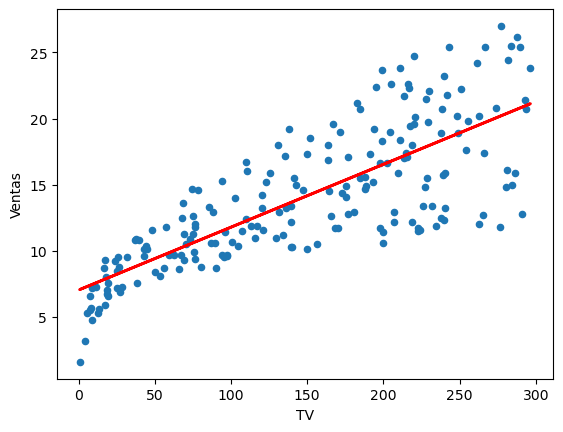

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(kind = 'scatter', x = 'TV', y = 'Ventas')
plt.plot(data['TV'], ventas_pred, c = 'red', linewidth = 2)

In [15]:
data['ventas_pred']= 0.047537 *data['TV'] + 7.032594

In [16]:
data.head()

,TV,Radio,Periodico,Ventas,ventas_pred
0,230.1,37.8,69.2,22.1,17.970858
1,44.5,39.3,45.1,10.4,9.147990
2,17.2,45.9,69.3,9.3,7.850230
3,151.5,41.3,58.5,18.5,14.234450
4,180.8,10.8,58.4,12.9,15.627284


# Error estandar residual RSE

El RSE es una medida de cuánto error existe entre las predicciones del modelo (ventas_pred) y los valores reales de ventas (Ventas). Cada fila en la columna "RSE" contiene el RSE para esa observación específica. Cuanto más bajo sea el valor del RSE, mejor será el ajuste del modelo a los datos para esa observación en particular.

In [17]:
data['RSE']= (data['Ventas']- data['ventas_pred'])**2

In [18]:
data.head()

,TV,Radio,Periodico,Ventas,ventas_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


In [19]:
SSD = sum(data['RSE'])
SSD

2102.5305838896525

# Calcular la desviacion Tipica

In [20]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [21]:
promedio_ventas = np.mean(data['Ventas'])
promedio_ventas

14.0225

# Error del modelo con respecto a los datos

In [22]:
error = RSE/promedio_ventas
error
print('% de Error es el: ', error*100,'%')

% de Error es el:  23.238768901680142 %


# Conclusión:

EL modelo representa (describe ) al menos el 61% de los datos y no se ajustan al modelo predictivo para el 23%

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

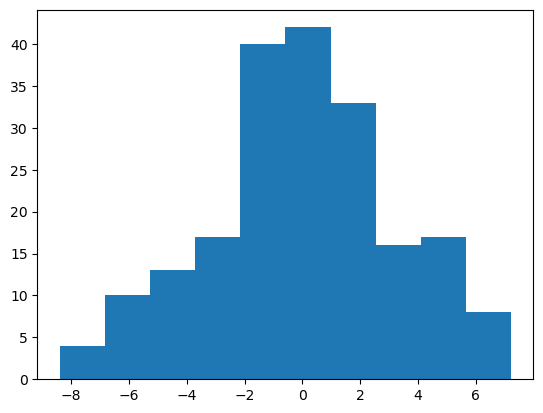

In [23]:
plt.hist(data['Ventas']- data['ventas_pred'])

para cualquier conjuntos de datos historicos , solo ver la correlacion de las variables

In [24]:
data.head()

,TV,Radio,Periodico,Ventas,ventas_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


In [25]:
lm2 = smf.ols(formula = 'Ventas~TV+Radio', data = data).fit()

In [27]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.83e-98
Time:                        09:20:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$Prediccion  = coef_1 var_1 + coef_2 var_2 + intercepto  $$

$$Ventas  = 0.0458 TV + 0.1880 Radio + 2.9211  $$


In [28]:
ventas_pred = lm2.predict(data[['TV','Radio']])

In [29]:
ventas_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [30]:
SSD = sum((data['Ventas']-ventas_pred)**2)
SSD

556.9139800676181

In [32]:
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080007

In [34]:
error = RSE/promedio_ventas
error
print('% de Error es el: ', error*100,'%')

% de Error es el:  11.990450436855058 %


## Agragando las 3 variables

In [35]:
lm3 = smf.ols(formula = 'Ventas~TV+Radio+Periodico ', data = data).fit()

In [37]:
lm3.summary()
#observemos que el modelo no mejora

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Ventas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        09:26:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Periodico     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
ventas_pred = lm2.predict(data[['TV','Radio','Periodico']])
SSD = sum((data['Ventas']-ventas_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))
error = RSE/promedio_ventas
error
print('% de Error es el: ', error*100,'%')

% de Error es el:  12.020999404676898 %


# RFE utilizando SKLEARN

In [39]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [40]:
data = pd.read_csv('Ventas.csv')

In [41]:
columnas_estimadas = ['TV','Radio','Periodico']

In [42]:
columnas_estimadas

['TV', 'Radio', 'Periodico']

In [43]:
x = data[columnas_estimadas]

In [44]:
y = data['Ventas']

In [45]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Ventas, Length: 200, dtype: float64

# Usando un estimador de variables con el SVR lineal

In [46]:
estimador = SVR(kernel= 'linear')

In [47]:
estimador

SVR(kernel='linear')

# utilizar el RFE conel estimador generado

In [48]:
selector = RFE(estimador,step=1)
selector = selector.fit(x,y)
selector

RFE(estimator=SVR(kernel='linear'))

In [50]:
selector.support_

array([False,  True, False])

In [51]:
selector.ranking_

array([2, 1, 3])

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
x_predic = x[['TV','Radio']]

In [54]:
x_predic

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [55]:
lm = LinearRegression()

In [56]:
lm.fit(x_predic,y)

LinearRegression()

In [57]:
lm.intercept_

2.921099912405131

In [58]:
lm.coef_

array([0.04575482, 0.18799423])